In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
    
def read_data(datafile):
    #read the file
    df = pd.read_csv(datafile,error_bad_lines=False,warn_bad_lines=False)
    return df
#datafile = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv"
data = "/Users/danish/Desktop/data_OR/HW6/taxi_data_much_reduced.csv"
df = read_data(data)

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,9449000,2,2016-01-04 15:57:18,2016-01-04 16:05:00,2,1.09,-73.974876,40.751133,1,N,-73.992744,40.758114,1,7.0,0.0,0.5,1.56,0.0,0.3,9.36
1,8395914,1,2016-01-21 05:44:17,2016-01-21 05:48:56,1,1.90,-73.986168,40.726368,1,N,-73.971855,40.749813,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95
2,475776,2,2016-01-02 12:47:17,2016-01-02 12:51:56,4,1.06,-73.984016,40.740528,1,N,-73.987892,40.728214,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30
3,7799335,1,2016-01-31 09:50:35,2016-01-31 10:01:49,1,2.70,-74.017159,40.705276,1,N,-73.994705,40.725899,1,11.0,0.0,0.5,1.00,0.0,0.3,12.80
4,6158121,2,2016-01-18 13:07:46,2016-01-18 13:10:33,1,0.59,-73.990013,40.766979,1,N,-73.980652,40.765148,2,4.0,0.0,0.5,0.00,0.0,0.3,4.80


In [83]:
#1. Remove any lines that have a “fare amount” of less than $2.50.
df1 = df[~(df['fare_amount']<2.5)]

#2. Convert dates and times into pandas date time objects
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

#3. Add a column “day_of_week” that contains the day of the week
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.day_name()

#4. Add a column “duration” that contains the duration of taxi rides (in minutes)
df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'] 
df1['duration'] = (df1['duration'].apply(lambda x:x/np.timedelta64(1, 's')))/60.0

#5. Remove rows with duration <= 0.0
df2 = df1[~(df1['duration']<=0.0)]

#6. Add a column “tip_percent” with tip as a percentage of fare_amount
df2['tip_percent'] = (df2['tip_amount']/df2['fare_amount'])*100

#7. Add an “hour of day“ column by extracting the hour from the pickup time
df2['hour of day'] = df2['tpep_pickup_datetime'].dt.hour

#8. Add day of month column by extracting 
df2['day of month'] = df2['tpep_pickup_datetime'].dt.day

df2['type'] = 'taxi'

/Users/danish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/danish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/danish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [85]:
df2

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_of_week,duration,tip_percent,hour of day,day of month,type
0,9449000,2,2016-01-04 15:57:18,2016-01-04 16:05:00,2,1.09,-73.974876,40.751133,1,N,...,1.56,0.0,0.3,9.36,Monday,7.700000,22.285714,15,4,taxi
1,8395914,1,2016-01-21 05:44:17,2016-01-21 05:48:56,1,1.90,-73.986168,40.726368,1,N,...,1.65,0.0,0.3,9.95,Thursday,4.650000,23.571429,5,21,taxi
2,475776,2,2016-01-02 12:47:17,2016-01-02 12:51:56,4,1.06,-73.984016,40.740528,1,N,...,0.00,0.0,0.3,6.30,Saturday,4.650000,0.000000,12,2,taxi
3,7799335,1,2016-01-31 09:50:35,2016-01-31 10:01:49,1,2.70,-74.017159,40.705276,1,N,...,1.00,0.0,0.3,12.80,Sunday,11.233333,9.090909,9,31,taxi
4,6158121,2,2016-01-18 13:07:46,2016-01-18 13:10:33,1,0.59,-73.990013,40.766979,1,N,...,0.00,0.0,0.3,4.80,Monday,2.783333,0.000000,13,18,taxi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181367,4054889,2,2016-01-28 20:53:21,2016-01-28 21:17:50,1,4.25,-73.988922,40.742699,1,N,...,0.00,0.0,0.3,20.30,Thursday,24.483333,0.000000,20,28,taxi
2181368,4067511,2,2016-01-25 19:59:39,2016-01-25 20:12:27,1,2.57,-73.997284,40.762268,1,N,...,2.46,0.0,0.3,14.76,Monday,12.800000,22.363636,19,25,taxi
2181369,8967389,2,2016-01-22 14:17:21,2016-01-22 14:25:34,5,0.85,-73.978539,40.756836,1,N,...,0.00,0.0,0.3,7.30,Friday,8.216667,0.000000,14,22,taxi
2181370,1067182,1,2016-01-04 19:18:22,2016-01-04 19:19:35,1,0.30,-73.988068,40.753971,1,N,...,0.95,0.0,0.3,5.75,Monday,1.216667,31.666667,19,4,taxi


In [86]:
df3 = df2.copy()
def segments(val):
    
    string = ''
    if val >=0 and val<2:
        string = '0 to 2 mile'
        return string
    if val >=2 and val<4:
        string = '2 to 4 mile'
        return string
    if val >=4 and val<6:
        string = '4 to 6 mile'
        return string
    if val >=6 and val<8:
        string = '6 to 8 mile'
        return string
    if val >=8 and val<10:
        string = '8 to 10 mile'
        return string
    if val >=10:
        string = 'more than 10 miles'
        return string
       

In [87]:
df3['dist segment'] = df3['trip_distance'].apply(lambda x: segments(x))

In [88]:
pie_df = df3.groupby(['hour of day','dist segment'])
pie_df = pie_df['duration'].mean()
pie_df = pie_df.unstack()
pie_df

dist segment,0 to 2 mile,2 to 4 mile,4 to 6 mile,6 to 8 mile,8 to 10 mile,more than 10 miles
hour of day,,,,,,
0,8.814291,15.618016,21.731741,26.232043,28.270925,70.829417
1,9.059625,15.398967,20.574345,26.150632,26.957211,33.952974
2,8.650015,15.383705,20.586917,25.013465,29.154151,36.598797
3,8.686527,14.224748,21.035310,25.886225,26.044291,34.162800
4,7.105646,13.374125,20.663890,25.333624,25.819556,30.942875
5,5.760235,13.304206,16.032892,23.169849,21.710714,32.369328
6,8.432016,11.691564,17.773578,20.158470,23.047011,39.665273
7,7.989354,16.081313,22.380580,24.028621,28.798323,44.031523
8,9.750218,18.732877,24.987348,27.120485,31.867059,46.999898


In [95]:
bike_df = pd.read_csv("clean-jan-2019.csv")

In [96]:
bike_df['distance'] = bike_df['tripduration'].apply(lambda x: (8.3/(60*60))*x)

In [97]:
bike_df['dist segment'] = bike_df['distance'].apply(lambda x: segments(x))
bike_df['type'] = 'Bike' 
bike_df['duration'] = bike_df['tripduration'].apply(lambda x:x/60)

In [98]:
#2. Convert dates and times into pandas date time objects
bike_df['starttime'] = pd.to_datetime(bike_df['starttime'],format='%Y-%m-%d %H:%M:%S.%f')
bike_df['stoptime'] = pd.to_datetime(bike_df['stoptime'],format='%Y-%m-%d %H:%M:%S.%f')

#7. Add an “hour of day“ column by extracting the hour from the pickup time
bike_df['hour of day'] = bike_df['starttime'].dt.hour

In [134]:
bike_df

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,end station longitude,bikeid,usertype,birth year,gender,distance,dist segment,type,duration,hour of day
0,0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,...,-73.970416,15839,Subscriber,1971,1,0.737778,0 to 2 mile,Bike,5.333333,0
1,1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,...,-73.973442,32723,Subscriber,1964,1,0.728556,0 to 2 mile,Bike,5.266667,0
2,2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,...,-73.958562,27451,Subscriber,1987,1,1.362583,0 to 2 mile,Bike,9.850000,0
3,3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,...,-73.996430,21579,Subscriber,1990,1,6.268806,6 to 8 mile,Bike,45.316667,0
4,4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,...,-73.987520,35379,Subscriber,1979,1,0.698583,0 to 2 mile,Bike,5.050000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858942,967273,293,2019-01-31 23:56:43.300,2019-02-01 00:01:37.138,293.0,Lafayette St & E 8 St,40.730207,-73.991026,325.0,E 19 St & 3 Ave,...,-73.984738,29704,Subscriber,1971,1,0.675528,0 to 2 mile,Bike,4.883333,23
858943,967276,404,2019-01-31 23:58:20.005,2019-02-01 00:05:04.500,161.0,LaGuardia Pl & W 3 St,40.729170,-73.998102,268.0,Howard St & Centre St,...,-73.999733,32991,Subscriber,1998,1,0.931444,0 to 2 mile,Bike,6.733333,23
858944,967277,389,2019-01-31 23:58:43.629,2019-02-01 00:05:13.562,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3145.0,E 84 St & Park Ave,...,-73.957721,34846,Subscriber,1960,1,0.896861,0 to 2 mile,Bike,6.483333,23
858945,967278,703,2019-01-31 23:59:12.521,2019-02-01 00:10:55.586,470.0,W 20 St & 8 Ave,40.743453,-74.000040,127.0,Barrow St & Hudson St,...,-74.006744,32666,Subscriber,1960,1,1.620806,0 to 2 mile,Bike,11.716667,23


In [100]:
bike_g = bike_df.groupby(['hour of day','dist segment'])
bike_g = bike_g['duration'].mean()
bike_g = bike_g.unstack()
bike_g

dist segment,0 to 2 mile,2 to 4 mile,4 to 6 mile,6 to 8 mile,8 to 10 mile,more than 10 miles
hour of day,,,,,,
0,7.011888,20.025460,35.122789,47.379845,61.933333,90.850000
1,7.007353,19.848131,35.395103,47.527778,63.514286,93.719444
2,6.847683,19.792367,36.175857,48.068018,63.166667,103.533333
3,6.928344,19.411045,34.293725,47.257500,70.050000,NaN
4,6.689082,20.034529,34.274123,46.453333,66.033333,96.566667
5,6.736053,19.222510,35.500652,47.320833,66.505556,92.387500
6,6.850454,19.541259,33.780419,47.383642,67.500000,90.943333
7,7.257933,19.565284,34.579218,46.967403,63.396667,92.421429
8,7.632398,19.721318,34.292252,47.379654,62.328205,90.621138


In [115]:
comb_df = pd.concat([df3,bike_df],ignore_index=True, sort=False)

In [116]:
combdf = comb_df[['dist segment','hour of day','duration','type',]]

In [117]:
combdf

,dist segment,hour of day,duration,type
0,0 to 2 mile,15,7.700000,taxi
1,0 to 2 mile,5,4.650000,taxi
2,0 to 2 mile,12,4.650000,taxi
3,2 to 4 mile,9,11.233333,taxi
4,0 to 2 mile,13,2.783333,taxi
...,...,...,...,...
3036321,0 to 2 mile,23,4.883333,Bike
3036322,0 to 2 mile,23,6.733333,Bike
3036323,0 to 2 mile,23,6.483333,Bike
3036324,0 to 2 mile,23,11.716667,Bike


In [129]:
p_df = combdf.groupby(['dist segment','type'])
p_df = p_df['duration'].mean()
p_df = p_df.unstack()
p_df

type,Bike,taxi
dist segment,,
0 to 2 mile,7.348907,9.729746
2 to 4 mile,19.861908,17.553329
4 to 6 mile,34.624171,22.935430
6 to 8 mile,48.048642,26.092635
8 to 10 mile,63.940225,28.928842
more than 10 miles,89.985941,41.921613


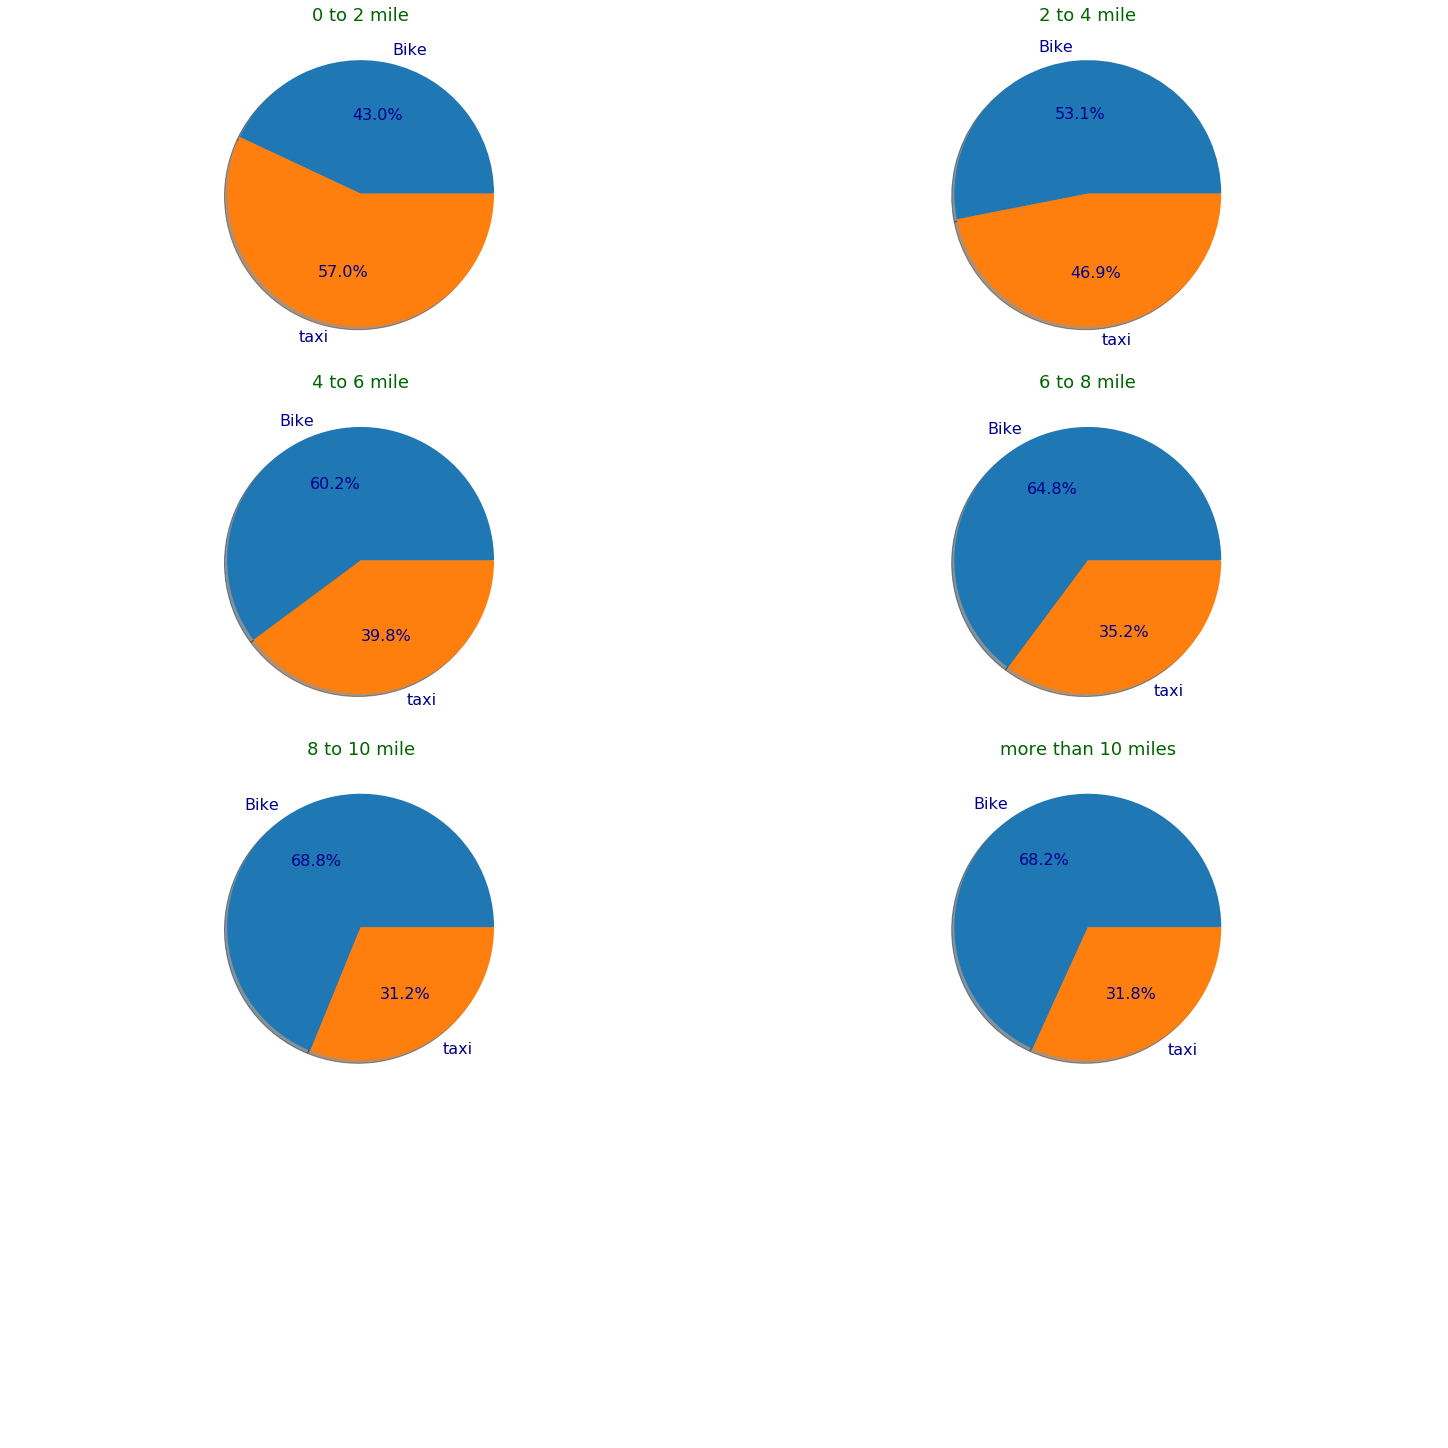

In [133]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import GridSpec


p_df.fillna(0,inplace=True)

#grid specs. The number of rows and columns in the grid
#also the index values, each value will correspond to one piechart
values = p_df.index
rows = len(values)//2 + 1
columns = 2

#Figure specs. Create the figure, specify the grid
fig = plt.figure(figsize=(20,20),constrained_layout = True)
grid = GridSpec(rows,columns,fig)

#labels are the same for all the charts so we can pull it out of the loop
labels = p_df.columns

#Iterate through values
#for each value, draw a piechart
#position it in the grid in the appropriate cell
for i in range(len(values)):
    plt.subplot(grid[i//2,i%2])
    sizes = p_df.loc[values[i]] 
    plt.pie(sizes,labels=labels,
            autopct='%1.1f%%',shadow=True,
            textprops={'color':'darkblue','fontsize':16})
    font = {'size':18,'color':'darkgreen'}
    plt.title(values[i],fontdict=font)
plt.show()